<a href="https://colab.research.google.com/github/Albert-Present/D/blob/main/Copy_of_W3Drones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [2]:
# from pathlib import Path
from fastai.vision.all import *

In [3]:
#Select True of False according to your choice
SAVE_ON_GDRIVE = True

In [4]:
if SAVE_ON_GDRIVE:
    root_dir = "/content/gdrive/My Drive/fastai/"
else:
    root_dir = "/content/"

base_dir = root_dir + 'unpackai/'

In [5]:
destination = Path(base_dir + '/drones')
os.makedirs(destination, exist_ok=True)
for t in ['nc', 'c']:
    path2class = untar_data(f"https://github.com/vtecftwy/unpackai-image-set/blob/main/{t}.zip?raw=true", 
                            fname=f"{t}.zip", 
                            dest=destination)
    assert path2class.is_dir(), f"problem downloading {t}"

path = destination

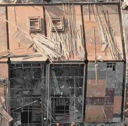

In [6]:
# make a list of all images of construction sites
list_c = [f for f in (path / 'c').iterdir() if f.is_file()]
list_c

# pick one and show it
picked_image = 0

im = Image.open(list_c[picked_image])
im.to_thumb(128,128)

In [7]:
drones = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = drones.dataloaders(path)

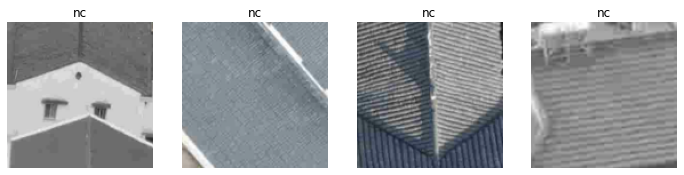

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

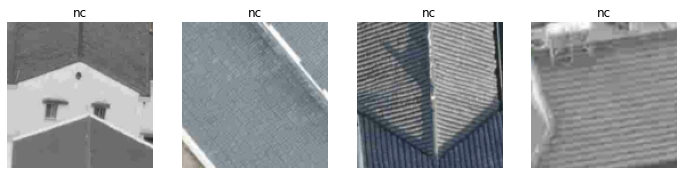

In [10]:
drones = drones.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = drones.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

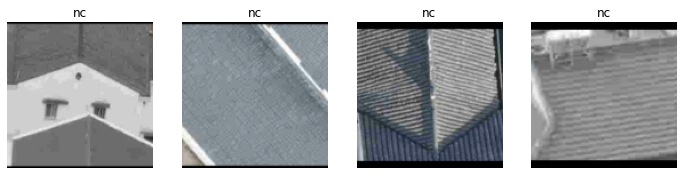

In [11]:
drones = drones.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = drones.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

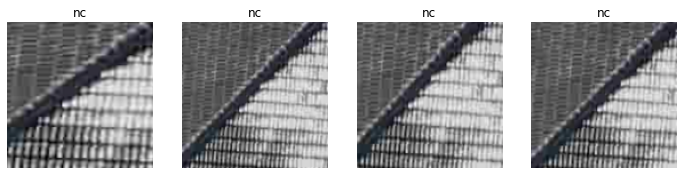

In [12]:
drones = drones.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = drones.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

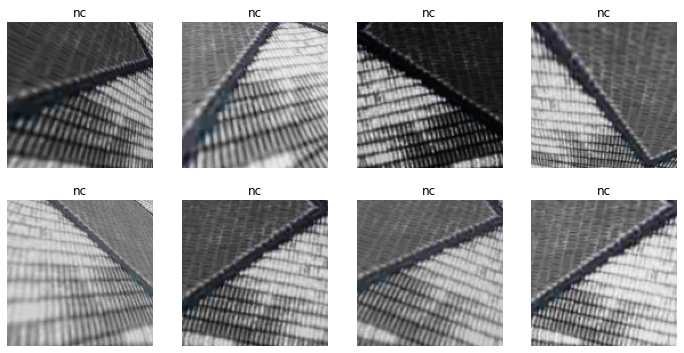

In [13]:
drones = drones.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = drones.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [14]:
drones = drones.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = drones.dataloaders(path)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.600663,1.603365,0.512820,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.665938,0.758632,0.307692,00:02
1,0.466607,0.434165,0.128205,00:02
2,0.364581,0.336847,0.102564,00:02


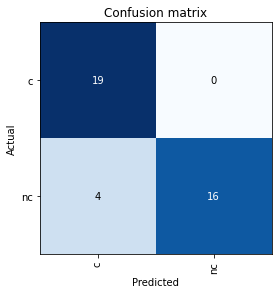

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

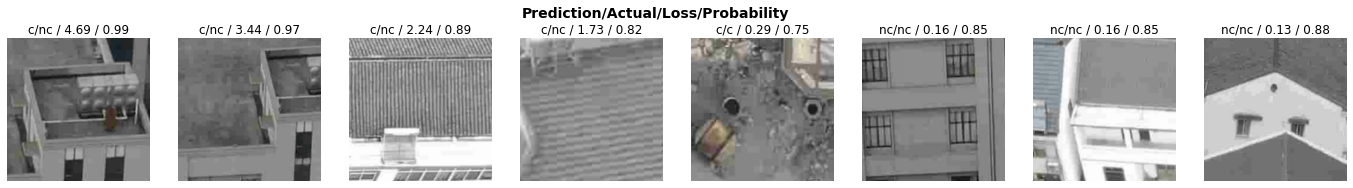

In [17]:
interp.plot_top_losses(8, nrows=1)

In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
# Load a non-construction image not in the dataset for inference
!wget https://raw.githubusercontent.com/vtecftwy/fastbook/master/images/grizzly.jpg

In [21]:
destination = Path(base_dir + '/inference')
os.makedirs(destination, exist_ok=True)
for t in ['car']:
    path2class = untar_data(f"https://github.com/vtecftwy/unpackai-image-set/blob/main/{t}.zip?raw=true", 
                            fname=f"{t}.zip", 
                            dest=destination)
    assert path2class.is_dir(), f"problem downloading {t}"

path = destination

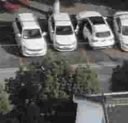

In [22]:
# make a list of all images of construction sites
list_car = [f for f in (path / 'car').iterdir() if f.is_file()]
list_car

# pick one and show it
picked_image = 0

im = Image.open(list_car[picked_image])
im.to_thumb(128,128)

In [ ]:
learn_inf.predict('picked_image')

In [ ]:
learn_inf.dls.vocab

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
# For the book, we can't actually click an upload button, so we fake it by giving a target image to the upload object.
# When you are in a jupyter notebook, use the button 'upload' above to load a new photos from your computer
# btn_upload = SimpleNamespace(data = ['grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 